## PRCP-1015-EquakeDamagePred

### Goal
Based on aspects of building location and construction, the goal is to analyze predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal

### Table of Contents
1. Domain analysis
2. Exploratory Data Analysis
   Data Visualization
3. Data preprocessing
4. Feature selection
5. Model creation
6. Model evaluation
   Machine Learning: Classification

## Problem description
We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

1. represents low damage
2. represents a medium amount of damage
3. represents almost complete destruction

## Features
The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

## Description
* geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.

* count_floors_pre_eq (type: int): number of floors in the building before the earthquake.

* age (type: int): age of the building in years.

* area_percentage (type: int): normalized area of the building footprint.

* height_percentage (type: int): normalized height of the building footprint.

* land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.

* foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.

* roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.

* ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.

* other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

* position (type: categorical): position of the building. Possible values: j, o, s, t.

* plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

* has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.

* has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar Stone.

* has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.

* has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

* has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

* has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

* has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.

* has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.

* has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

* has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.

* has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.

* legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.

* count_families (type: int): number of families that live in the building.

* has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.

* has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.

* has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.

* has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.

* has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.

* has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.

* has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.

* has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.

* has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.

* has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.

* has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.


## Performance metric
We are predicting the level of damage from 1 to 3. The level of damage is an ordinal variable meaning that ordering is important. This can be viewed as a classification or an ordinal regression problem. (Ordinal regression is sometimes described as an problem somewhere in between classification and regression.)

To measure the performance of our algorithms, we'll use the F1 score which balances the precision and recall of a classifier. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score.

In [ ]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.getcwd()

'C:\\Users\\patel\\Downloads\\Earth\\Data'

In [ ]:
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
data =pd.read_csv('train_values.csv')
train_labels= pd.read_csv('train_labels.csv')

In [ ]:
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


The data contains details about buildings/ constructions damaged due to the earthquake occured in the region
for that we are provided with geographical details, how many floor does the building had, age of construction, height, land surface, materials

In [ ]:
train_labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


# Basic checks

In [ ]:
print(data.shape)
print(train_labels.shape)

(260601, 39)
(260601, 2)


##### The train label consist of each building id and its damage grade(1,2,3) hence we merge the labels with the training data on the building id

In [ ]:
#merge the label/target column with features
data1 = pd.merge(data, train_labels, on='building_id')

In [ ]:
data1

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


### o/p is discrete values so, it can be concluded as a classification problem

In [ ]:
data1.shape

(260601, 40)

In [ ]:
# Inspecting the first rows of the dataframe
data1.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
data1.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# Getting basic infos about the features
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
# Print summary statistics
data1.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
 #these are categorical features
data1.describe(include = 'O')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


In [ ]:
data1.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
for column in data1.columns:
    print(column, data1[column].nunique())

building_id 260601
geo_level_1_id 31
geo_level_2_id 1414
geo_level_3_id 11595
count_floors_pre_eq 9
age 42
area_percentage 84
height_percentage 27
land_surface_condition 3
foundation_type 5
roof_type 3
ground_floor_type 5
other_floor_type 4
position 4
plan_configuration 10
has_superstructure_adobe_mud 2
has_superstructure_mud_mortar_stone 2
has_superstructure_stone_flag 2
has_superstructure_cement_mortar_stone 2
has_superstructure_mud_mortar_brick 2
has_superstructure_cement_mortar_brick 2
has_superstructure_timber 2
has_superstructure_bamboo 2
has_superstructure_rc_non_engineered 2
has_superstructure_rc_engineered 2
has_superstructure_other 2
legal_ownership_status 4
count_families 10
has_secondary_use 2
has_secondary_use_agriculture 2
has_secondary_use_hotel 2
has_secondary_use_rental 2
has_secondary_use_institution 2
has_secondary_use_school 2
has_secondary_use_industry 2
has_secondary_use_health_post 2
has_secondary_use_gov_office 2
has_secondary_use_use_police 2
has_secondary_use_

In [ ]:
#categorical features with unique values
for col in data1.select_dtypes(include='object').columns:
    print(col, data1[col].unique())

land_surface_condition ['t' 'o' 'n']
foundation_type ['r' 'w' 'i' 'u' 'h']
roof_type ['n' 'q' 'x']
ground_floor_type ['f' 'x' 'v' 'z' 'm']
other_floor_type ['q' 'x' 'j' 's']
position ['t' 's' 'j' 'o']
plan_configuration ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
legal_ownership_status ['v' 'a' 'r' 'w']


# Numeric And Categorical Columns

Seperating the dataset into numerical and categorical datatype is a important step before doing any further kind of cleaning. Doing the process, helps the user to properly clean the different types of data with specific methods. So, let us do it. We will be using the .select_dtypes method of pandas to do the process

In [ ]:
# Seperating the numeric columns.
num_columns = data1.select_dtypes(include =[np.number])

# Seperating the Categorical columns
cat_columns = data1.select_dtypes('object')

let's see the lists of columns that are created.

In [ ]:
num_columns.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

In [ ]:
cat_columns.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [ ]:
num_columns.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
cat_columns.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v


# Exploratory data analysis

This stage involves exploring the dataset and gaining insight about features that will have signifcant impact when building our model

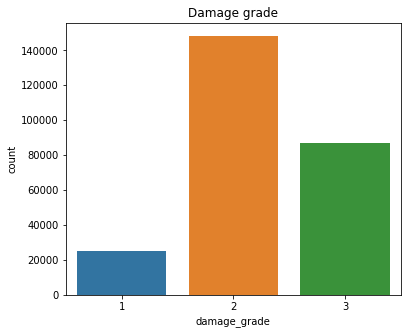

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x = data1.damage_grade, data= data1)
plt.title('Damage grade')
plt.show()

In [ ]:
data1.damage_grade.value_counts(normalize=True)*100

2    56.891186
3    33.468022
1     9.640792
Name: damage_grade, dtype: float64

In [ ]:
print('number of buildings with low damage grade : {}'.format(sum(data1['damage_grade']==1)))
print('number of buildings with medium damage grade : {}'.format(sum(data1['damage_grade']==2)))
print('number of buildings with high damage grade : {}'.format(sum(data1['damage_grade']==3)))
print('')
print('percentage of buildings with low damage grade : {:.2f}%'.format(sum(data1['damage_grade']==1)/data1.shape[0]*100))
print('percentage of buildings with medium damage grade : {:.2f}%'.format(sum(data1['damage_grade']==2)/data1.shape[0]*100))
print('percentage of buildings with high damage grade : {:.2f}%'.format(sum(data1['damage_grade']==3)/data1.shape[0]*100))

number of buildings with low damage grade : 25124
number of buildings with medium damage grade : 148259
number of buildings with high damage grade : 87218

percentage of buildings with low damage grade : 9.64%
percentage of buildings with medium damage grade : 56.89%
percentage of buildings with high damage grade : 33.47%


* Based on the above image and details it can be concluded as the number of the buildings with a meduim level of damage was the most at 56.89% followed by buildings with a high level of damage at 33.47% and buildings with a low level of damage at 9.64%
* Hence  it's an imbalanced dataset

In [ ]:
data1.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

## Geographic level and Damage grade

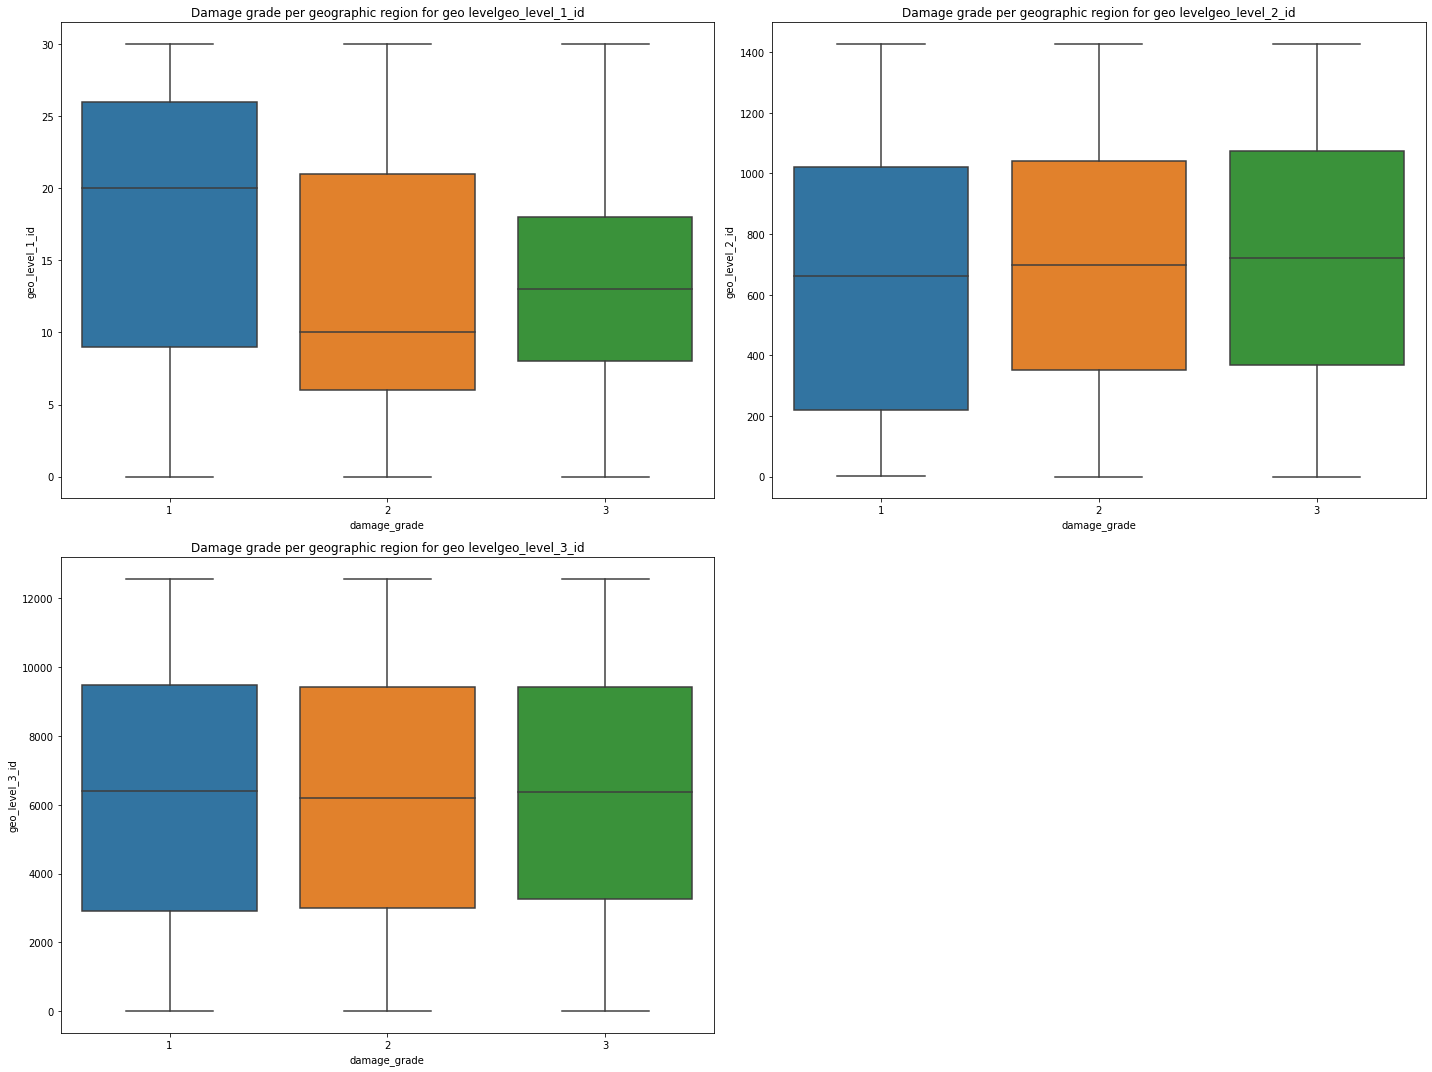

In [ ]:
geo_col = data1[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']]#largest region level 1,most specific subregion level 3
plt.figure(figsize=(20,15))
plotnumber=1

for i in geo_col:
    plt.subplot(2,2,plotnumber)
    sns.boxplot(x = data1['damage_grade'], y= data1[i])
    plt.title(f'Damage grade per geographic region for geo level{i}')
    plotnumber+=1
plt.tight_layout()

As we can see in the above graph of geo_level_1, higher values of geological levels results to less damage whereas lower levels of geological levels results to more damage.

Buildings located at geographic level 2 have low, medium and high damage grades. At geographic level 2, lower level of geographical region results to less damage and higher level of geographical region results to more damage

Buildings located at geographic level 3 have low, medium and high damage grades. Graph shows that as we become less specific to the place where the locations are, it leads to less effect of it on the independent variable.
Geographic region level 3 is a narrower than other geographic region levels, so buildings at geo level 3 have nearly the same level of damage across all grades.

## Number of floors in the building before the earthquake

<AxesSubplot:>

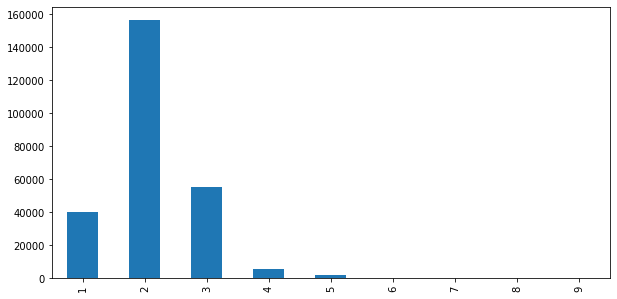

In [ ]:
plt.figure(figsize=(10,5))
data1['count_floors_pre_eq'].value_counts().sort_index().plot.bar()

##### There are buildings in the dataset with up to 9 floors, but the majority of the affect had only 2.

## Number of floors in the building and Damage grade

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='count'>

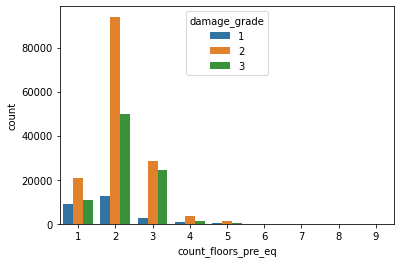

In [ ]:
sns.countplot(x='count_floors_pre_eq', hue= 'damage_grade', data=data1)

##### From the above graph, we observe that buildings with 2 floors has a significant damage grade, followed by buildings with 3 floors and a floor. We also observed that building with 2 floors has a medium damage grade followed by a high damage grade, this also reflect across buildings with 3 floors and a floor.

## Relationship between age of building and damage grade

<AxesSubplot:>

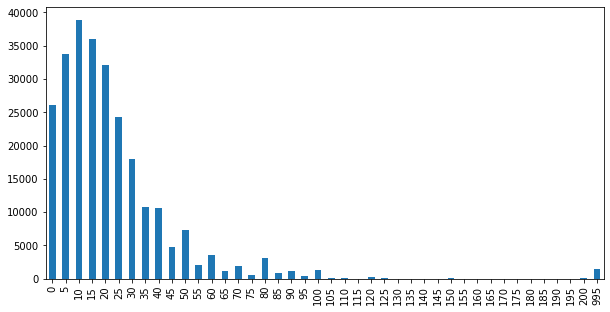

In [ ]:
plt.figure(figsize=(10,5))
data1['age'].value_counts().sort_index().plot.bar()

##### There are a significant number of building with Zero age. These are either newer construction (less than an year old) or the data is missing for these buildings.
#### Maximun number of buildings age lies in range 10 to 15

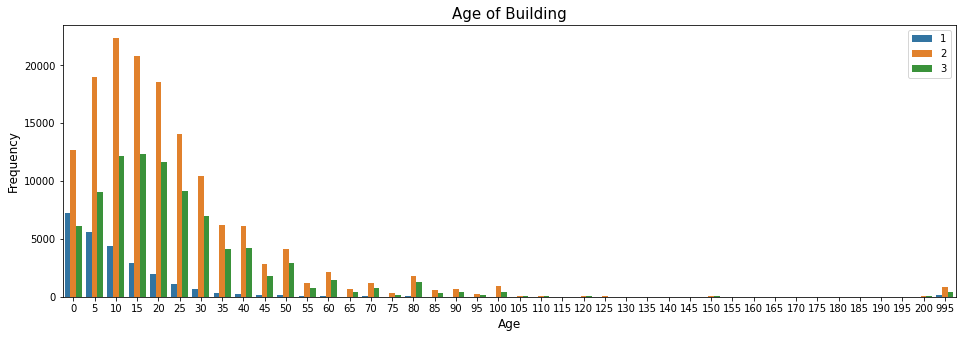

In [ ]:
plt.figure(figsize=(16,5))

sns.countplot(x = data1['age'], hue=data1['damage_grade'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age of Building', fontsize=15)
plt.legend(loc='upper right')
plt.show()

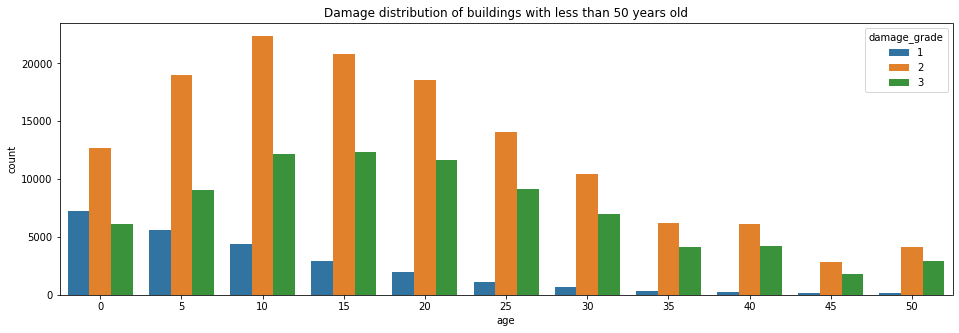

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Damage distribution of buildings with less than 50 years old')
sns.countplot(x='age',data=data1[data1['age']<=50],hue='damage_grade')
plt.show()

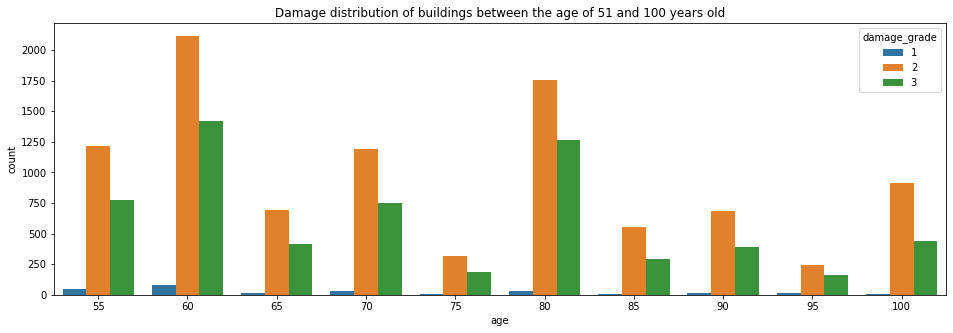

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Damage distribution of buildings between the age of 51 and 100 years old')
dt = data1.loc[(data1['age'] > 50) & (data1['age']<=100)]
sns.countplot(x='age',data=dt,hue='damage_grade')
plt.show()

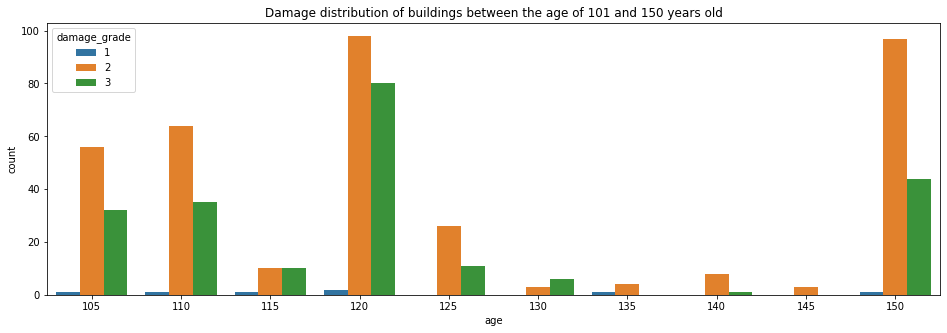

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Damage distribution of buildings between the age of 101 and 150 years old')
dt = data1.loc[(data1['age'] > 100) & (data1['age']<=150)]
sns.countplot(x='age',data=dt,hue='damage_grade')
plt.show()

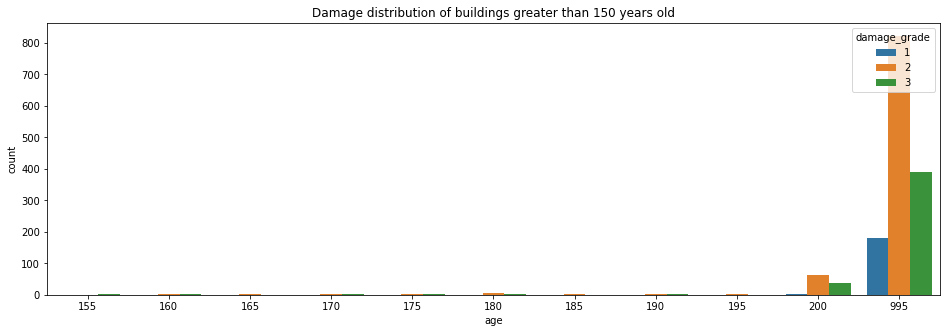

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Damage distribution of buildings greater than 150 years old')
tr=data1[data1['age']>150]
sns.countplot(x='age',data=tr,hue='damage_grade')
plt.show()

A significant observation to note from the above chart shows that building with less than 50 years of age has a dominating damage grade that is medium, with notable increase of damage on buildings between zero to 20 years of age particularly 10 years of age, with a steady decline from 25 years of age to 45 years of age,we can observe that building with 100 years and 150 years out of variation there is slight increase in damage grade with severity that is medium. This implies that age has a major factor in determining the level of damage that is going to affect the building.
As we can see that the buildings of less age suffer less damage during the earthquake

## Area and Height percentage with Damage grade

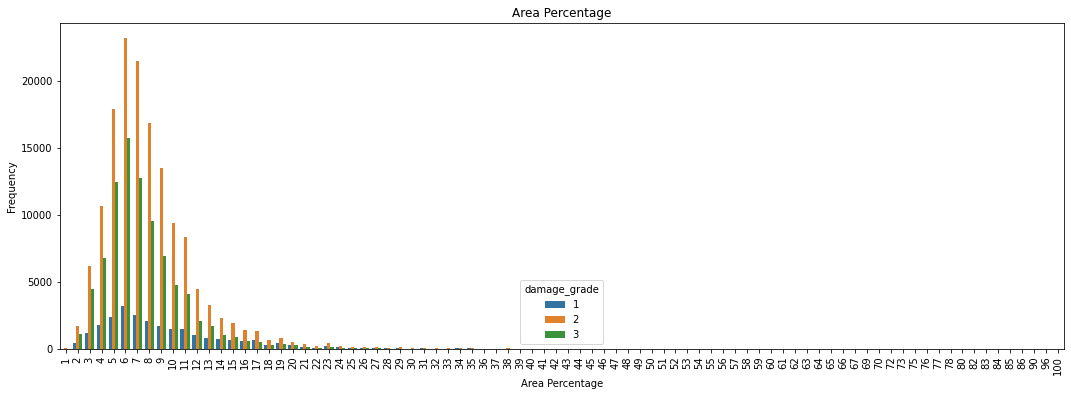

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=data1["area_percentage"],hue=data1["damage_grade"])
plt.xlabel("Area Percentage")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.title("Area Percentage")
plt.show()

* The normalized area of the building footprint is less than 20% for most buildings  and is level moderate damage from earthquake. It is important to mention that some values go up to 100%, so it is important for us to take care of the outliers of this feature.
* We can see that area_percentage has a binomial distribution with most of the values lying between 5 to 20 percentage.
* We can see that among the three damage level of 1 seems to be the most stable one with gradual increase or decrease of values followed by the rows with damage level 3.

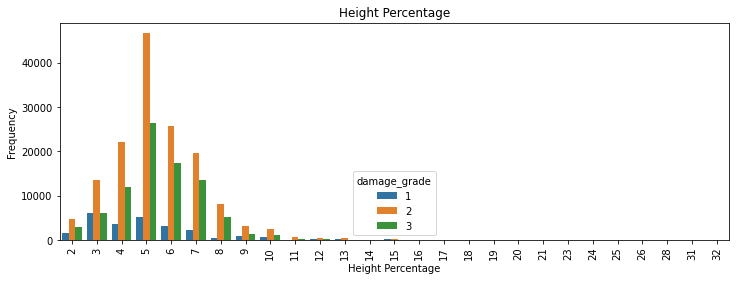

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x=data1["height_percentage"],hue=data1["damage_grade"])
plt.xlabel("Height Percentage")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.title("Height Percentage")
plt.show()

The height percentages mostly lie between a range of 0 to 15 percentage, but we have some buildings with values up to 32%.. It is a binomial distribution with the highest values lieing on 5 percent. It is evident from the graph that the standard deviation of it is not very much meaning that most of the values lie in a certain small scale. We can also say that a lower level of height percentage leads to less damage during an earthquake.

## Count of families with Damage grade

<AxesSubplot:xlabel='count_families', ylabel='count'>

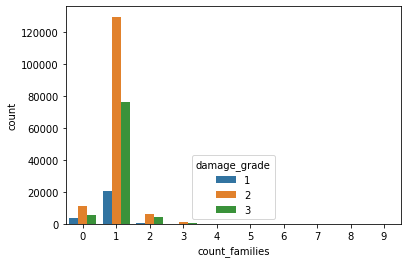

In [ ]:
sns.countplot(x='count_families', hue= 'damage_grade', data=data1)

##### Most of the buildings had only 1 familiy living in them medium rate of damage is more followed by high damage. We also have buildings with up to 9 families were living in, this buildings could be the same as those buildings with 9 floors.

## Categorical columns

In [ ]:
cat_columns = data1[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']]

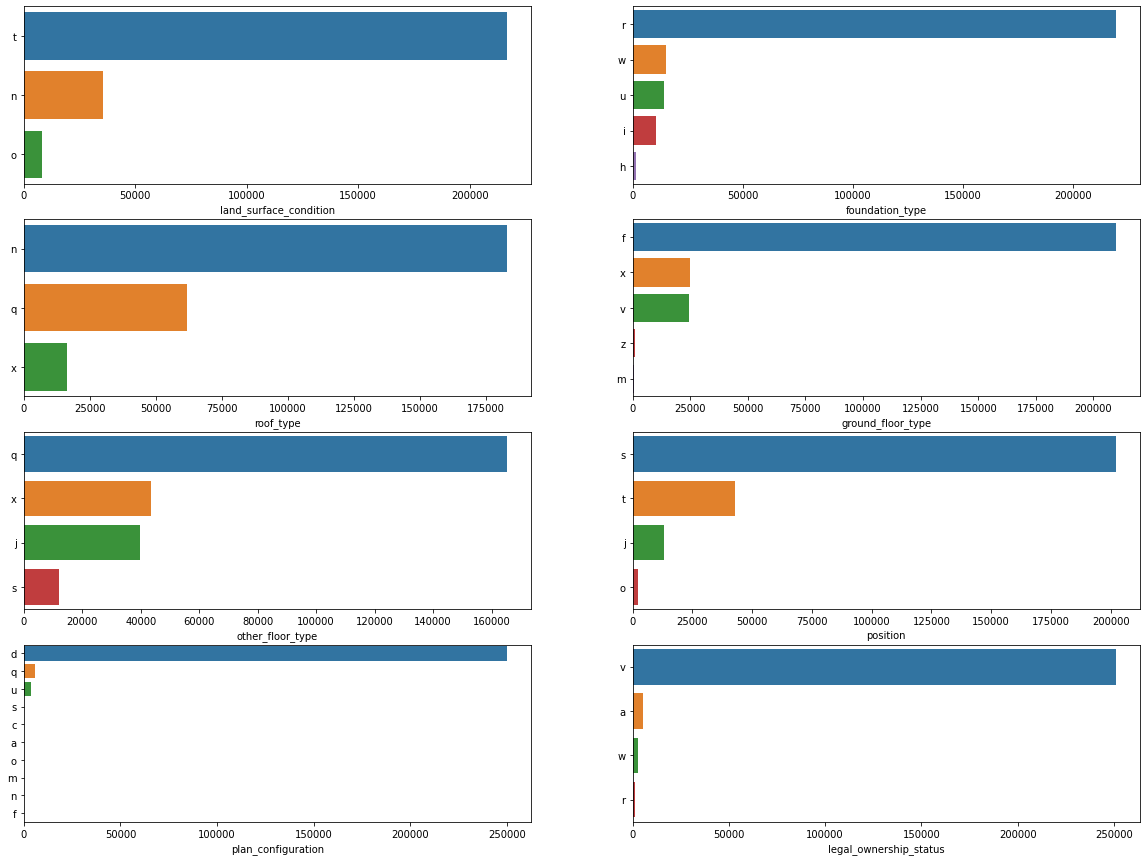

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber=1

for i in cat_columns:
    plt.subplot(4,2, plotnumber)
    sns.barplot(x=cat_columns[i].value_counts(), y=cat_columns[i].value_counts().index, data= data1)
    plotnumber+=1
plt.show()
plt.tight_layout()

## Bivariate analysis for Categorical columns
 to check realtionship between features and target

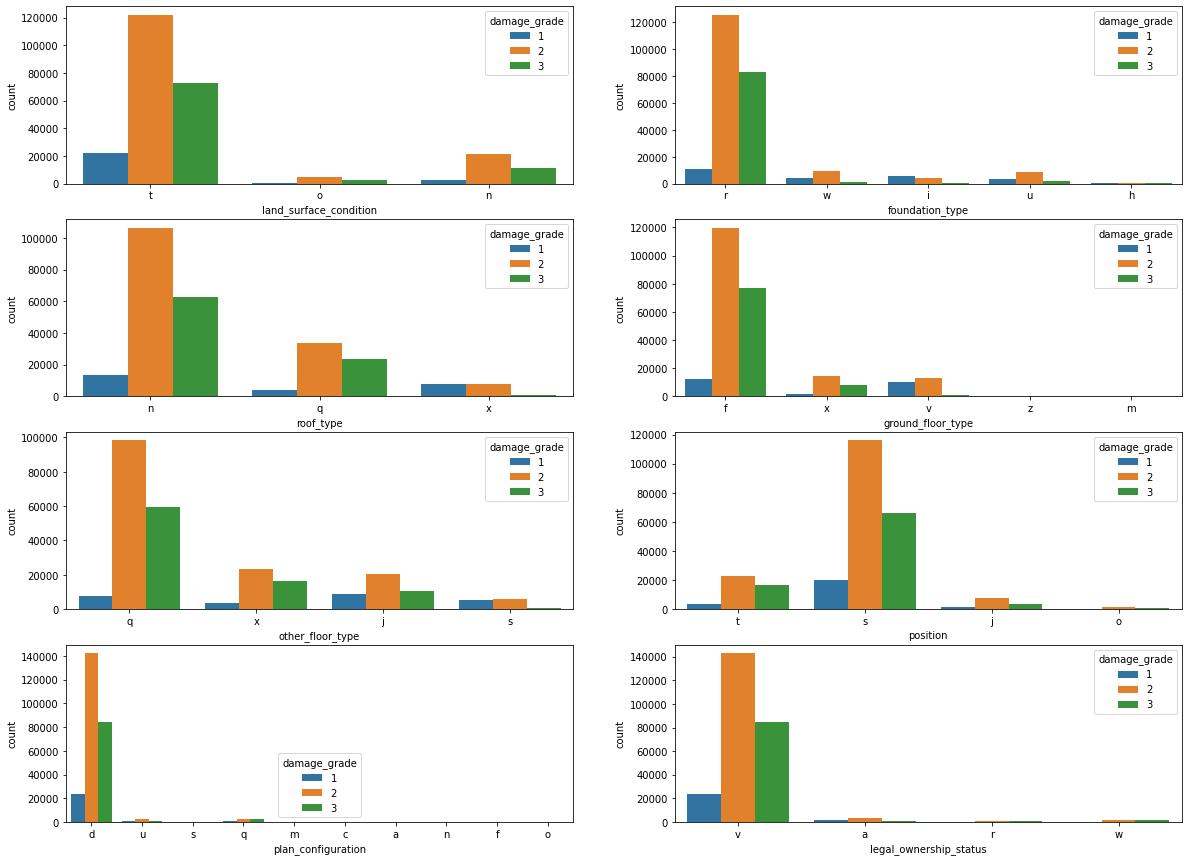

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber=1

for i in cat_columns:
    plt.subplot(4,2, plotnumber)
    sns.countplot(x = cat_columns[i], hue =data1['damage_grade'], data = cat_columns)
    plotnumber+=1
plt.show()
plt.tight_layout()

* Looking at the land surface condition of the building, the type 't' has a significant impact on the severity of damage on the building
* Looking at the foundation type, we can observe that the value 'r' has a significant impact on the severity of damage on the building
* looking at the Roof type, the value 'n' has a  significant impact on the damage of the building
* Ground floor type of the value 'f' has a significant impact on the level of damage on the building
* Other floor type of the building, with the value 'q' has a significant impact on the level of damage on the building
* Looking at the position of the building, the value 's' has a significant impact on the severity of medium damage on the building followed by high damage
* Building plan configuration with the value 'd' has a significant impact on the damage of the building
* Highest Legal ownership status of the land where building was built is 'v' and it has a significant impact on the damage of the building  

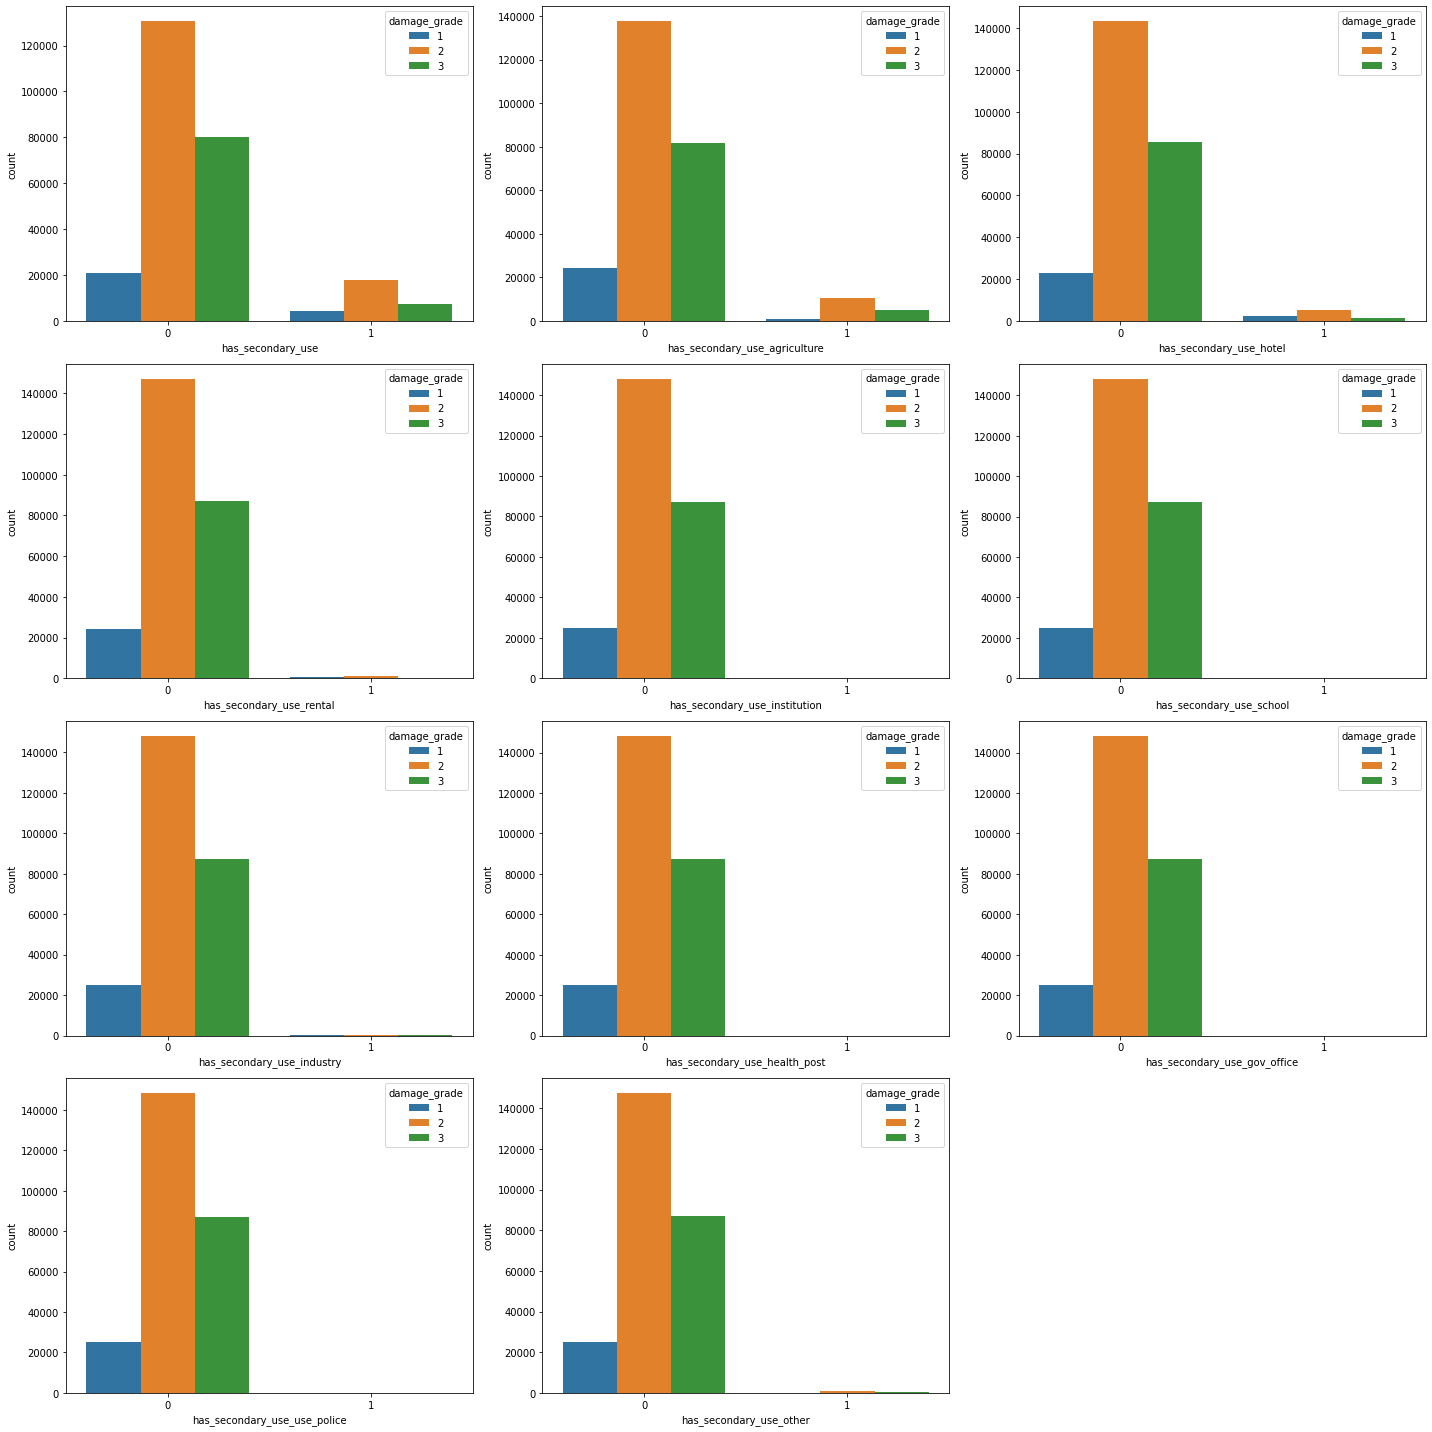

In [ ]:
sec_use_info=data1[['has_secondary_use','has_secondary_use_agriculture', 'has_secondary_use_hotel','has_secondary_use_rental', 'has_secondary_use_institution','has_secondary_use_school', 'has_secondary_use_industry','has_secondary_use_health_post', 'has_secondary_use_gov_office','has_secondary_use_use_police', 'has_secondary_use_other']]
plt.figure(figsize=(20,20))
plotnumber=1

for i in sec_use_info:
    plt.subplot(4,3, plotnumber)
    sns.countplot(x = data1[i], hue= 'damage_grade' ,data= data1 )
    plotnumber+=1
plt.tight_layout()

* Apart from buildings for private purposes, many buildings in Nepal are used for agriculture, hotels, rentals, institutions, schools, health posts, government offices, police stations and other purposes.
* buildings that have a secondary purpose as agricultural facilities and hotels are the two sectors with the highest number of buildings compared to buildings with other secondary purposes.
* Most buildings with a secondary purpose for agriculture and hotels suffered modrate levels of damage

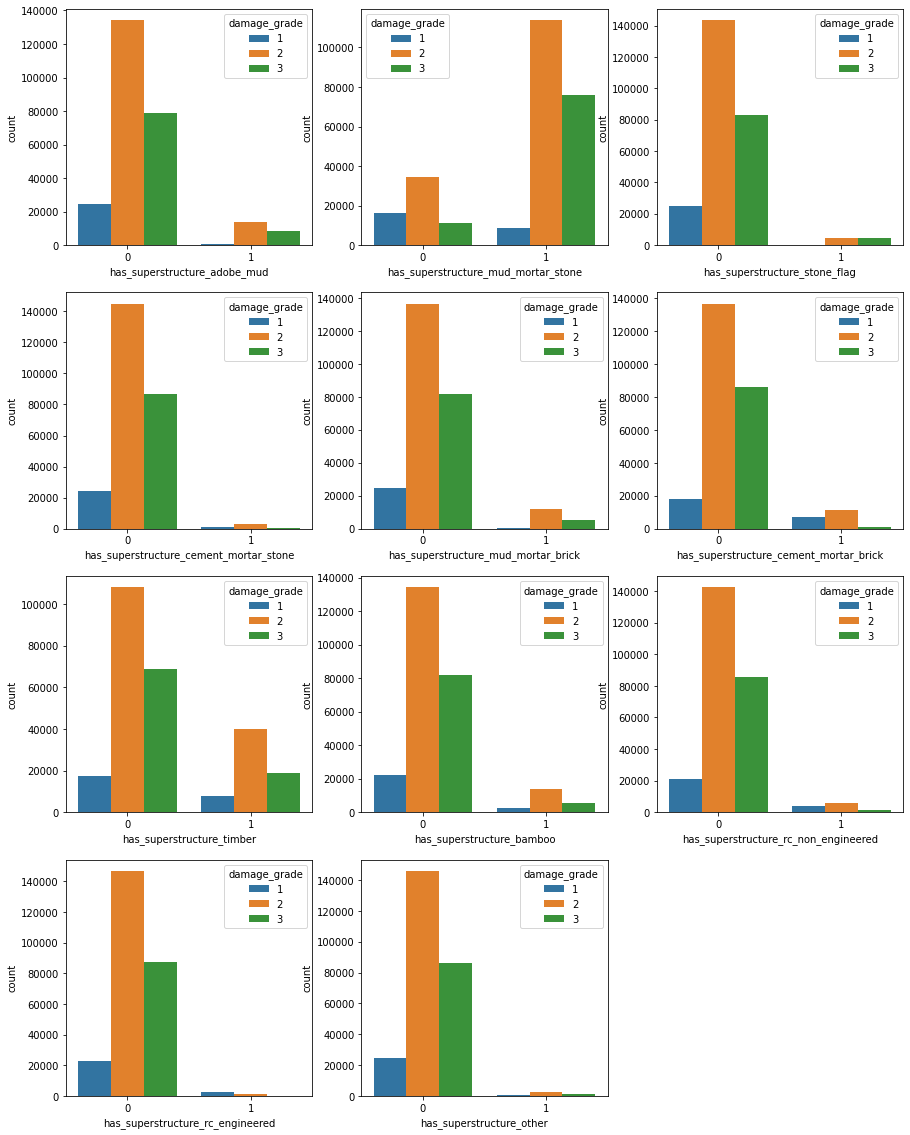

In [ ]:
building_stru_info = data1[['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']]
plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1
for i in building_stru_info:
    plt.subplot(4,3, plotnumber)
    sns.countplot(x=data1[i],hue="damage_grade",data=data1)
    plotnumber+=1

* Top 3 types of structures those got damaged the most were made up of :
   Mud mortar stone, timber, bamboo and some more form of mud.

* Types of structures those got affected the least were made up of :
  stone_flag, cement_mortar_stone and rc_engineered type.
  This shows that these buildings either with held the earthquake well or they were far away from the epicenter.

## Data Preprocessing

* Check for null values
* Converting categorical data to numerical data
* Handling with outliers

In [ ]:
data1.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

no null values are present

## Converting Categorical data to numerical data

## Encoding

Encoding is yet another data processing step in which the catgorical columns are converted to numerical columns by various methods. Some common encoding methods are as follows:

* One-hot/ dummy encoding
* Label / Ordinal encoding

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
cat_columns.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [ ]:
data1.land_surface_condition = le.fit_transform(data1.land_surface_condition)
data1.foundation_type = le.fit_transform(data1.foundation_type)
data1.roof_type = le.fit_transform(data1.roof_type)
data1.ground_floor_type = le.fit_transform(data1.ground_floor_type)
data1.other_floor_type = le.fit_transform(data1.other_floor_type)
data1.position = le.fit_transform(data1.position)
data1.plan_configuration = le.fit_transform(data1.plan_configuration)
data1.legal_ownership_status = le.fit_transform(data1.legal_ownership_status)

In [ ]:
data1.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,2,2,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,1,2,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,2,2,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,2,2,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,2,2,...,0,0,0,0,0,0,0,0,0,3


## Checking for outliers

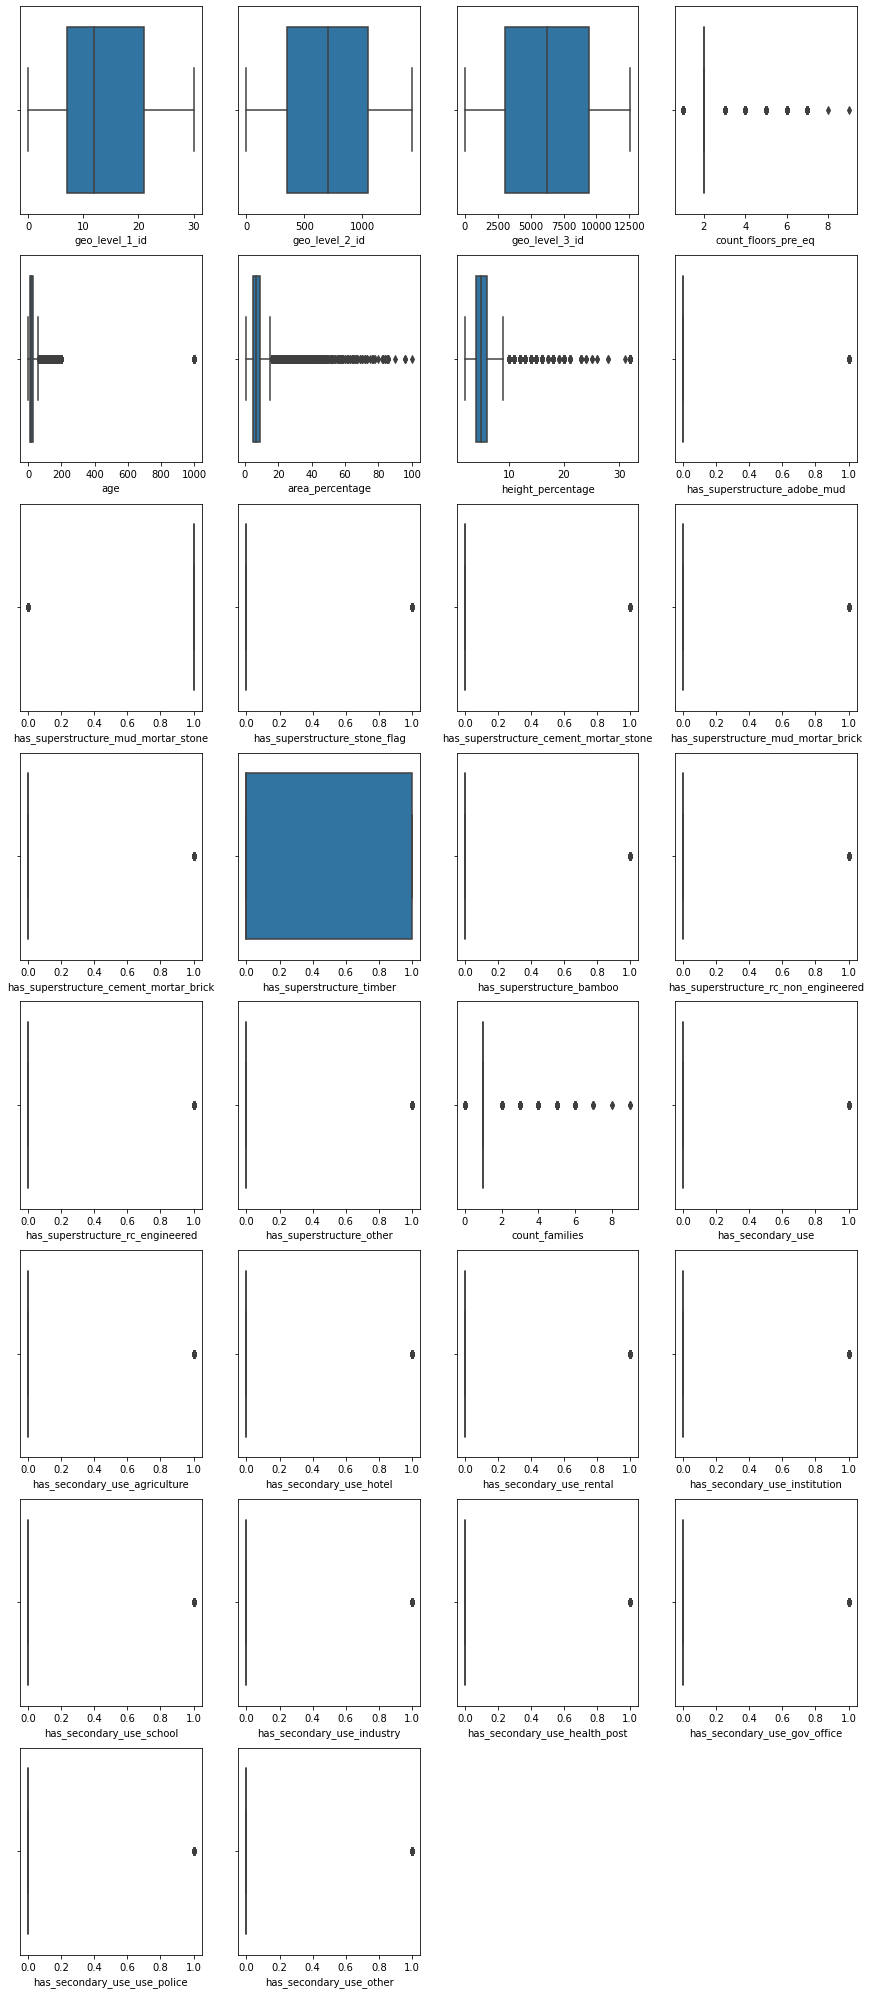

In [ ]:
data_box = data1[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other']]

plt.figure(figsize=(15,45), facecolor='white')
plotnumber=1

for i in data_box:
    plt.subplot(10,4,plotnumber)
    sns.boxplot(x=data1[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [ ]:
data1.loc[data1.age > 150, 'age'] = np.median(data1.age)
data1.loc[data1.area_percentage > 30, 'area_percentage'] = np.median(data1.area_percentage)
data1.loc[data1.height_percentage > 15, 'height_percentage'] = np.median(data1.height_percentage)

## Feature Selection

In [ ]:
corr = data1.corr()
corr     #dont want to see the correlation with target so below droping it

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.002850,0.000347,-0.000393,-0.000654,-0.000175,-0.003364,0.000894,-0.003397,-0.002293,...,0.001934,-0.002152,0.000706,-0.000362,0.002348,-0.000374,0.000538,-0.003116,-0.002295,0.001063
geo_level_1_id,-0.002850,1.000000,-0.061405,0.002718,-0.089364,-0.044905,0.062140,-0.068633,0.030434,0.197030,...,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,0.000347,-0.061405,1.000000,0.000921,0.047730,0.028654,-0.035940,0.037915,-0.034365,-0.034404,...,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,-0.000393,0.002718,0.000921,1.000000,-0.021646,-0.005933,-0.003989,-0.021515,-0.015610,0.007081,...,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.000654,-0.089364,0.047730,-0.021646,1.000000,0.300693,0.104430,0.775088,0.043832,-0.149130,...,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,-0.000175,-0.044905,0.028654,-0.005933,0.300693,1.000000,-0.029802,0.218775,0.023298,-0.093072,...,-0.045213,-0.022881,-0.013974,-0.008221,-0.004953,-0.004522,-0.003420,-0.001982,-0.006255,0.150571
area_percentage,-0.003364,0.062140,-0.035940,-0.003989,0.104430,-0.029802,1.000000,0.202122,0.028275,-0.102747,...,0.145650,0.106511,0.041990,0.030373,0.021601,0.013849,0.012202,0.006067,0.011947,-0.124315
height_percentage,0.000894,-0.068633,0.037915,-0.021515,0.775088,0.218775,0.202122,1.000000,0.022674,-0.145751,...,0.108202,0.066124,0.023621,0.015120,-0.000095,0.012044,0.015698,0.004415,0.003169,0.052691
land_surface_condition,-0.003397,0.030434,-0.034365,-0.015610,0.043832,0.023298,0.028275,0.022674,1.000000,-0.009165,...,0.009847,0.008792,0.003889,0.004538,0.002525,0.001176,0.000719,0.002937,-0.011874,-0.012218
foundation_type,-0.002293,0.197030,-0.034404,0.007081,-0.149130,-0.093072,-0.102747,-0.145751,-0.009165,1.000000,...,-0.069214,-0.049471,-0.021222,-0.006347,0.004415,-0.005235,-0.010164,-0.003342,-0.007687,-0.100601


<AxesSubplot:>

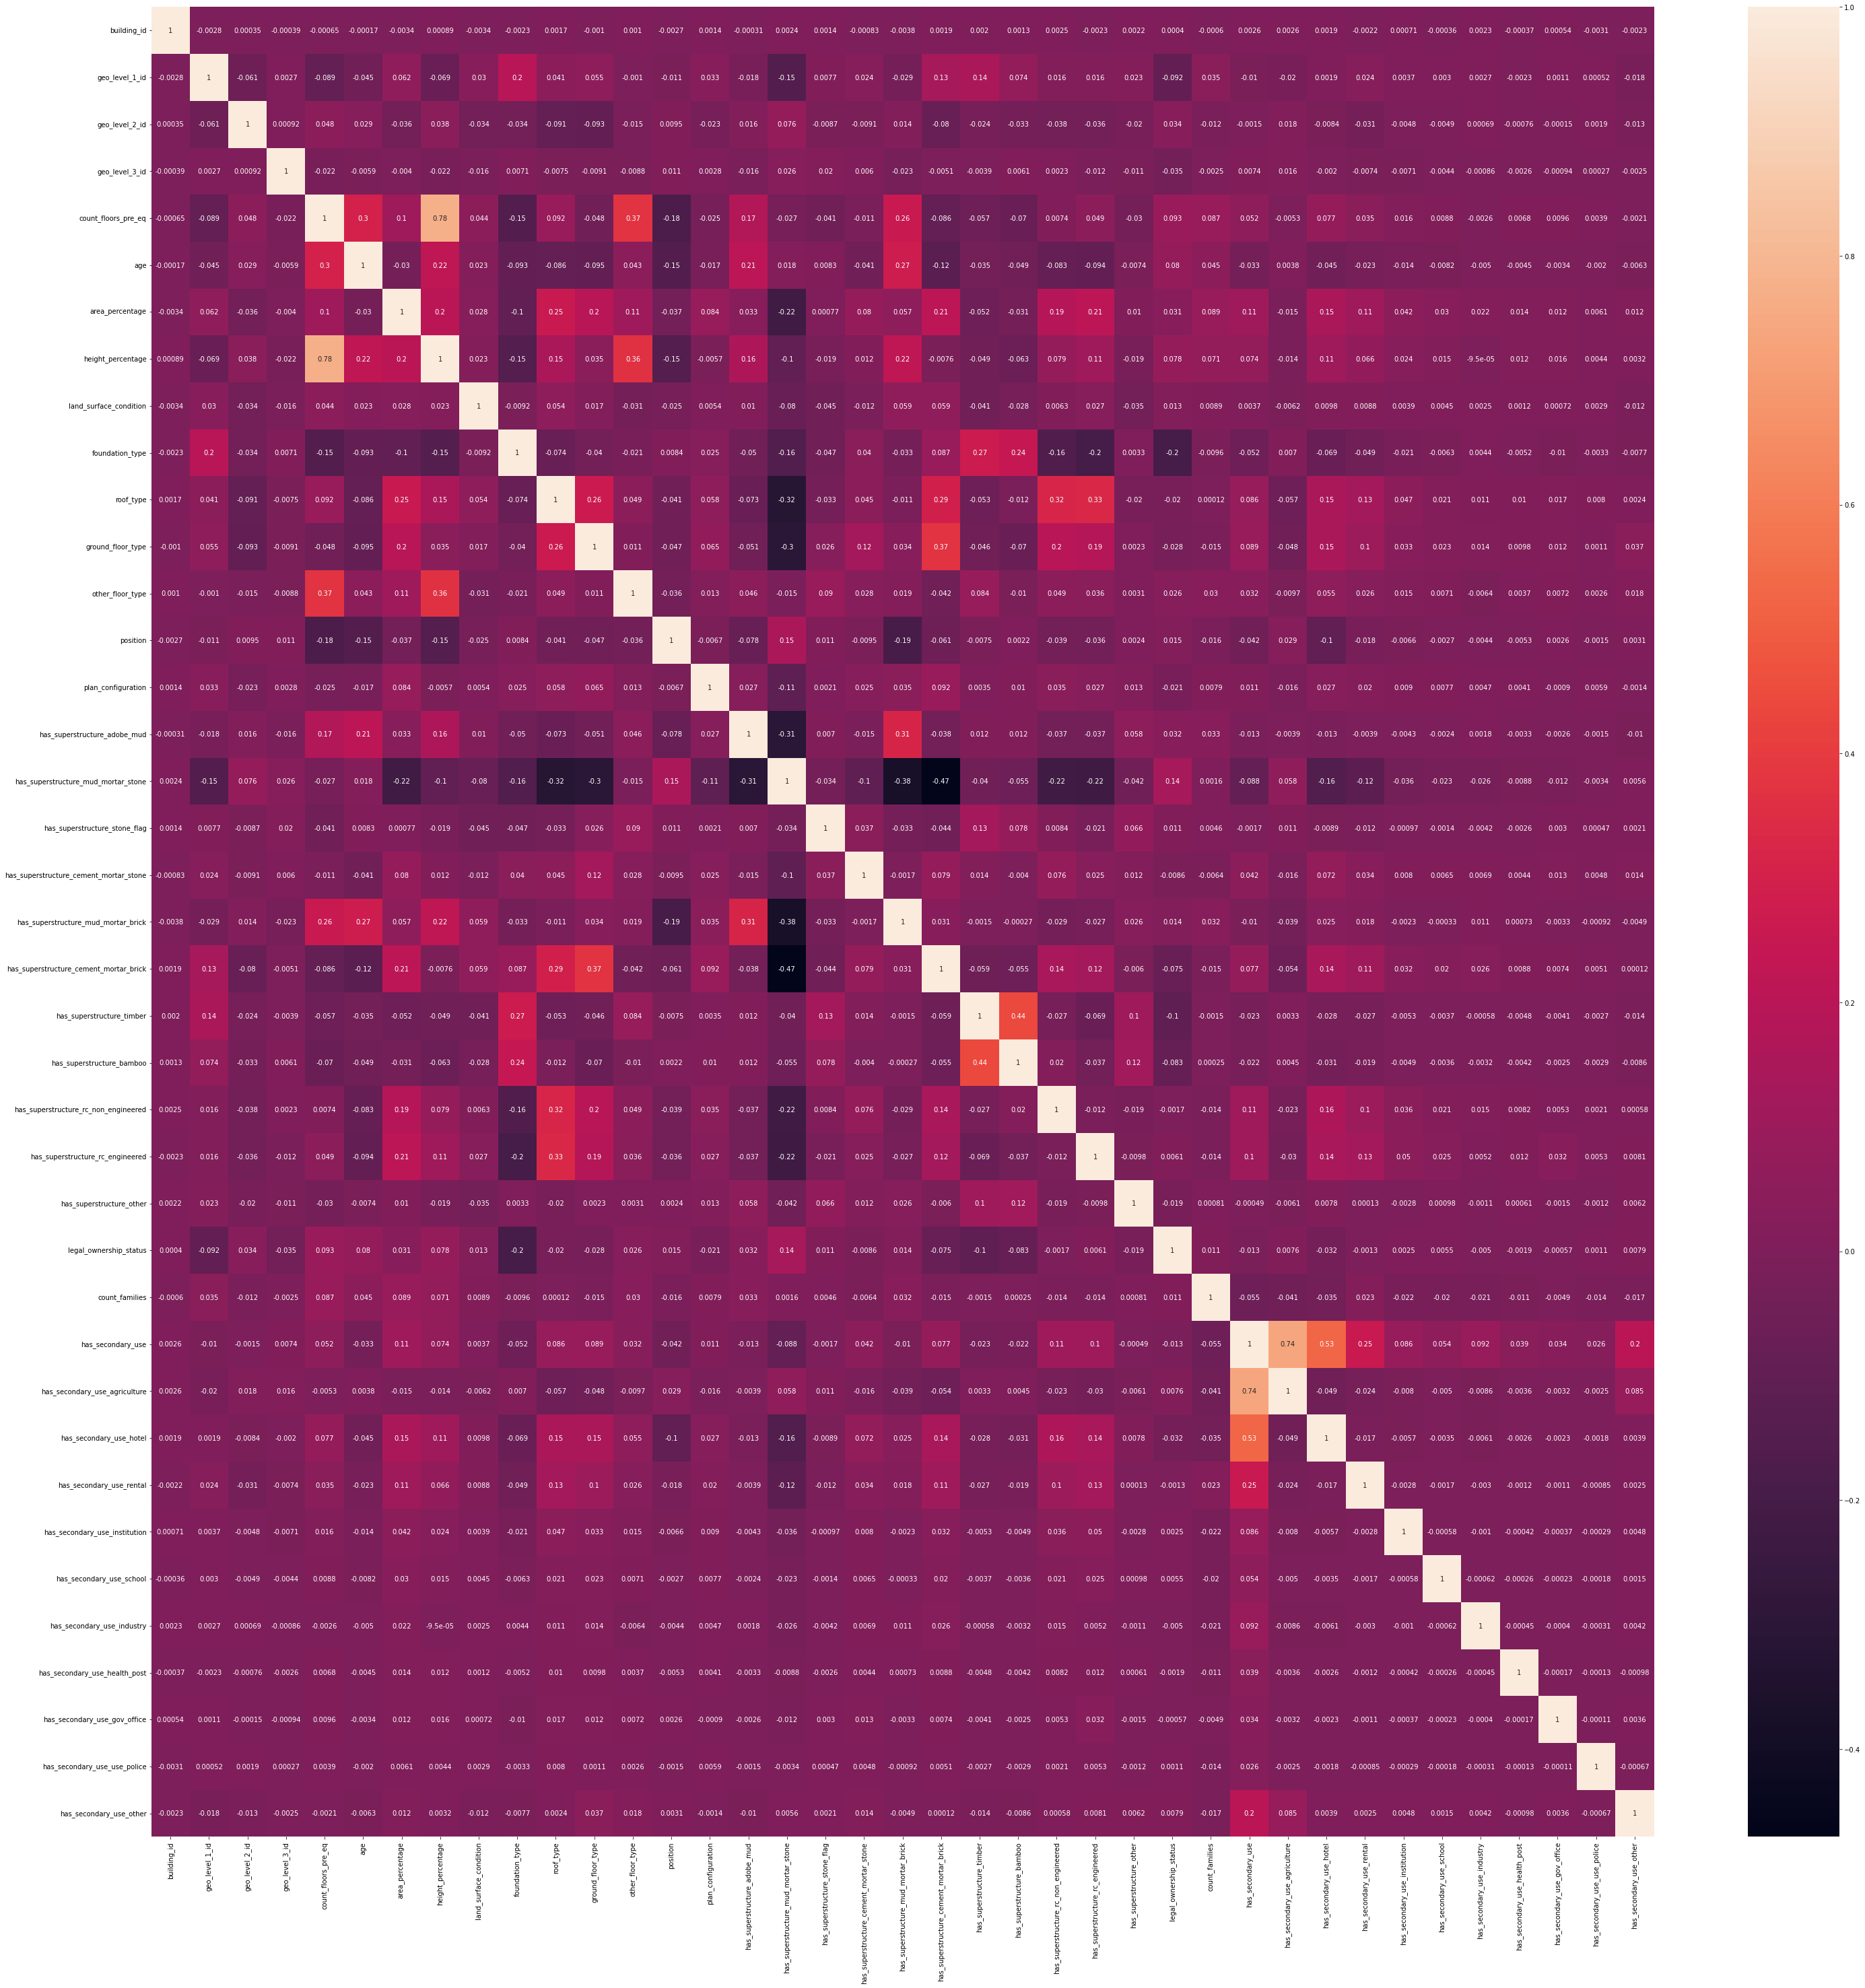

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(data1.drop('damage_grade',axis=1).corr(), annot =True)

#### There is no co-relation between any columns

## Model Creation

* Scaling
* Balancing

In [ ]:
#creating independent and dependent variable
x= data1.drop('damage_grade', axis=1)
y = data1.damage_grade

In [ ]:
x

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30.0,6.0,5.0,2,2,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10.0,8.0,7.0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10.0,5.0,5.0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10.0,6.0,5.0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30.0,8.0,9.0,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55.0,6.0,3.0,0,2,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0.0,6.0,5.0,2,2,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55.0,6.0,7.0,2,2,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10.0,14.0,6.0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

## Scaling Numeric Features

A formal meaning of Scaling is a follows.

Feature scaling is a method used to normalize the range of independent variables or features of data. It is generally performed during the data preprocessing step.

This very much clears the image of Scaling but one thing to note here is that it is generally confused with normalization of data. Basically, in scaling we change the range of our data, while in normalization, we change the shape of the distribution of our data.

In [ ]:
#importing the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Let's fit the scaler to the data and transform the values.

In [ ]:
# Fitting the Scaler and tranforming values.
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.76254072, 0.2       , 0.3412754 , ..., 0.        , 0.        ,
        0.        ],
       [0.02737694, 0.26666667, 0.63069376, ..., 0.        , 0.        ,
        0.        ],
       [0.09017029, 0.7       , 0.25437982, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57222038, 0.56666667, 0.03573931, ..., 0.        , 0.        ,
        0.        ],
       [0.14379398, 0.86666667, 0.02733006, ..., 0.        , 0.        ,
        0.        ],
       [0.71000921, 0.7       , 0.00630694, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
x1 =pd.DataFrame(data= x_scaled, columns =x.columns)
x1

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0.762541,0.200000,0.341275,0.970637,0.125,0.200000,0.172414,0.230769,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027377,0.266667,0.630694,0.223761,0.125,0.066667,0.241379,0.384615,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.090170,0.700000,0.254380,0.714013,0.125,0.066667,0.137931,0.230769,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.561175,0.733333,0.292922,0.850959,0.125,0.066667,0.172414,0.230769,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.191789,0.366667,0.091801,0.118405,0.250,0.200000,0.241379,0.538462,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.654015,0.833333,0.935529,0.128989,0.000,0.366667,0.172414,0.076923,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260597,0.635827,0.566667,0.501051,0.163921,0.125,0.000000,0.172414,0.230769,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260598,0.572220,0.566667,0.035739,0.649558,0.250,0.366667,0.172414,0.384615,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260599,0.143794,0.866667,0.027330,0.147291,0.125,0.066667,0.448276,0.307692,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Balancing

In [ ]:
data1.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
x_smote,y_smote = smote.fit_resample(x,y)

In [ ]:
from collections import Counter
print(Counter(y))
print(Counter(y_smote))

Counter({2: 148259, 3: 87218, 1: 25124})
Counter({3: 148259, 2: 148259, 1: 148259})


We split the data into training and testing set, so that we can fit and evaluate a learning model. we will use the train_test_split() function from scikit-learn and use 75% data for training and 25% data for testing.

In [ ]:
# Splitting the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.25, random_state=42, stratify= y_smote)

In [ ]:
x_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
186635,949301,27,181,4369,3,25.000000,7.000000,6.000000,2,2,...,0,0,0,0,0,0,0,0,0,0
249967,422309,26,39,10795,2,30.000000,7.000000,6.000000,2,2,...,0,0,0,0,0,0,0,0,0,0
377345,744598,7,722,5928,1,0.000000,7.435608,2.423294,2,1,...,0,0,0,0,0,0,0,0,0,0
194825,734433,22,913,11332,2,25.000000,4.000000,5.000000,2,2,...,0,0,0,0,0,0,0,0,0,0
340238,844792,26,864,11542,2,14.375880,5.624120,5.875176,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189899,594410,17,1080,4391,3,30.000000,5.000000,7.000000,2,2,...,0,0,0,0,0,0,0,0,0,0
125265,429550,30,1205,10316,2,55.000000,12.000000,4.000000,2,2,...,0,0,0,0,0,0,0,0,0,0
415084,200195,14,88,6866,2,48.263781,4.387730,6.224541,2,2,...,0,0,0,0,0,0,0,0,0,0
236302,1008255,6,37,7962,2,25.000000,4.000000,6.000000,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
25705,673386,27,181,1654,3,35.000000,11.000000,10.000000,2,2,...,0,0,0,0,0,0,0,0,0,0
284505,455860,24,930,10661,2,18.729144,8.000000,4.127086,1,3,...,0,0,0,0,0,0,0,0,0,0
442519,88312,6,1240,7610,2,22.643970,8.735603,7.000000,1,2,...,0,0,0,0,0,0,0,0,0,0
257214,1050733,26,302,5868,2,0.000000,4.000000,7.000000,2,4,...,0,0,0,0,0,0,0,0,0,0
161677,121413,21,1390,983,3,100.000000,9.000000,6.000000,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297276,840554,13,223,1178,2,15.262780,6.473722,5.000000,2,2,...,0,0,0,0,0,0,0,0,0,0
131035,691487,17,1064,491,3,35.000000,7.000000,6.000000,0,2,...,0,0,0,0,0,0,0,0,0,0
369466,928917,7,1026,3351,3,10.000000,7.000000,8.585345,2,1,...,0,0,0,0,0,0,0,0,0,0
31063,272241,5,736,9013,3,30.000000,6.000000,7.000000,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

186635    2
249967    2
377345    1
194825    2
340238    1
         ..
189899    3
125265    2
415084    3
236302    3
245521    2
Name: damage_grade, Length: 333582, dtype: int64

In [ ]:
y_test

25705     2
284505    1
442519    3
257214    1
161677    3
         ..
297276    1
131035    3
369466    1
31063     2
287499    1
Name: damage_grade, Length: 111195, dtype: int64

# Model Evaluation

* This stage involves training a machine learning model with all the listed features to make predictions for the target variable Damage_Grade. Damage grade is the target feature given the goal of the project to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

* To measure the performance of our algorithms, we'll use the F1 score
  So, F1 score is nothing but the harmonic mean of precision and recall, where as F1 score reaches its best value at 1 and worst score at 0.
  The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is as follows:

  ![image.png](attachment:704c9178-4d89-4687-beda-b03d809cb260.png)


* In the multi-class and multi-label case, F1 score is the average of the F1 score of each class with weighting depending on the average parameter.     The average parameter we are asked to use is micro which means to calculate the metrics globally by counting the total true positives, false      negatives and false positives.


* Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score as mentioned earlier.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, classification_report, recall_score

## Prediction from Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='ovr', class_weight= 'balanced', random_state=42, max_iter=1000, n_jobs=-1)
LR.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr',
                   n_jobs=-1, random_state=42)

## Testing score

In [ ]:
y_pred = LR.predict(x_test)
y_pred

array([3, 1, 3, ..., 1, 3, 3], dtype=int64)

In [ ]:
accuracy_score(y_pred, y_test)

0.4766851027474257

## Training score

In [ ]:
y_trainpre = LR.predict(x_train)
y_trainpre

array([3, 3, 1, ..., 3, 2, 1], dtype=int64)

In [ ]:
accuracy_score(y_train, y_trainpre)

0.4739464359587748

In [ ]:
#for multiclss use average= micro
pr = precision_score(y_test,y_pred, average = 'micro')
pr

0.4766851027474257

In [ ]:
f1 = f1_score(y_test,y_pred, average = 'micro')
f1

0.4766851027474257

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.51      0.75      0.61     37065
           2       0.40      0.08      0.13     37065
           3       0.45      0.60      0.52     37065

    accuracy                           0.48    111195
   macro avg       0.45      0.48      0.42    111195
weighted avg       0.45      0.48      0.42    111195



In [ ]:
#same confusion matrix can be print using pandas
pd.crosstab(y_test,y_pred)

col_0,1,2,3
damage_grade,,,
1,27855,1667,7543
2,14737,2822,19506
3,12098,2639,22328


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[27855  1667  7543]
 [14737  2822 19506]
 [12098  2639 22328]]


In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(LR, x_train, y_train, cv=3, scoring="f1_micro")

array([0.48731946, 0.40155044, 0.46979154])

In [ ]:
print(f1_score(y_train, LR.predict(x_train), average='micro'))
print(f1_score(y_test, LR.predict(x_test), average='micro'))

0.4739464359587748
0.4766851027474257


## Bagging using Logistic Regression

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bagg = BaggingClassifier(base_estimator = LR , n_estimators = 100, n_jobs=-1, random_state=42)

In [ ]:
model_bagg.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                    max_iter=1000,
                                                    multi_class='ovr',
                                                    n_jobs=-1,
                                                    random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

## Testing score

In [ ]:
y_hat_bagg = model_bagg.predict(x_test)
f1_bagg_LR = f1_score(y_test,y_hat_bagg, average = 'micro')
f1_bagg_LR

0.48604703448896086

## Training score

In [ ]:
y_train_bagg = model_bagg.predict(x_train)
f1_train_bagg = f1_score(y_train,y_train_bagg, average = 'micro')
f1_train_bagg

0.48369816117176584

## Decision tree
   row sampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_test_pre=dt.predict(x_test)
y_test_pre

array([3, 1, 3, ..., 1, 2, 1], dtype=int64)

In [ ]:
y_train_pre = dt.predict(x_train)
y_train_pre

array([2, 2, 1, ..., 3, 3, 2], dtype=int64)

In [ ]:
acc_train = accuracy_score(y_train, y_train_pre)
acc_train

1.0

In [ ]:
f1 = f1_score(y_test,y_test_pre, average = 'micro')
f1

0.7134313593237106

In [ ]:
print(classification_report(y_test,y_test_pre))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81     37065
           2       0.67      0.67      0.67     37065
           3       0.66      0.66      0.66     37065

    accuracy                           0.71    111195
   macro avg       0.71      0.71      0.71    111195
weighted avg       0.71      0.71      0.71    111195



In [ ]:
print(f1_score(y_train, y_train_pre, average='micro'))
print(f1_score(y_test, y_test_pre, average='micro'))  #overfitting (low bias ,high variance)

1.0
0.7134313593237106


In [ ]:
tree_importance_data1 = pd.DataFrame({
    'column_name(feature)': x_train.columns,
    'importance': dt.feature_importances_
})

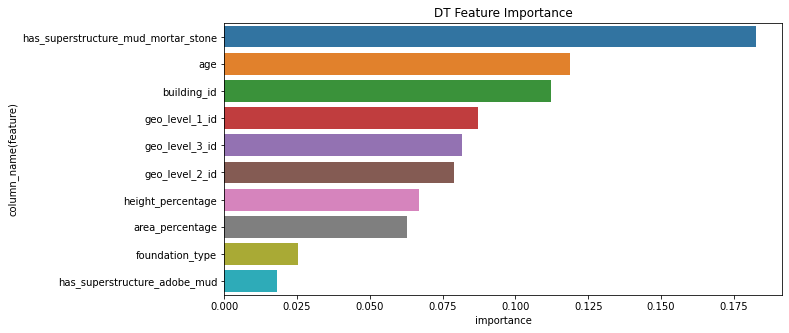

In [ ]:
plt.figure(figsize=(10,5))
plt.title('DT Feature Importance')
sns.barplot(data=tree_importance_data1.sort_values(by = 'importance', ascending=False).head(10), x='importance', y='column_name(feature)');

### Hyperparameter tunning for decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    "criterion":["gini"],
    "splitter":["best"],
    "max_depth":[int(x) for x in np.linspace(10, 60, num=6)],
    "min_samples_split":[3],
    "min_samples_leaf":list(range(1, 10)),
}

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
tree_cv = RandomizedSearchCV(dt, params, scoring="f1_micro", n_jobs=-1, error_score='raise', verbose=3, cv=kfold)

In [ ]:
tree_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [3],
                                        'splitter': ['best']},
                   scoring='f1_micro', verbose=3)

In [ ]:
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})") #this is giving the best in gievn params so, use it in DT

Best paramters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_depth': 20, 'criterion': 'gini'})


In [ ]:
Best_paramters: ({'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_depth': 20, 'criterion': 'gini'})

In [ ]:
tree_cv.best_score_ #among all thecombinatn the best givng is this

0.7351685629696842

In [ ]:
#using best creteria train DT
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf= 1, min_samples_split= 3, splitter= 'best')#passing best parameter to decision tree

In [ ]:
dt1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=3)

In [ ]:
y_test_pre1 = dt1.predict(x_test)
y_test_pre1

array([3, 1, 3, ..., 1, 2, 3], dtype=int64)

In [ ]:
y_train_pre1 = dt1.predict(x_train)

In [ ]:
print(classification_report(y_test,y_test_pre1))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83     37065
           2       0.68      0.72      0.70     37065
           3       0.70      0.67      0.69     37065

    accuracy                           0.74    111195
   macro avg       0.74      0.74      0.74    111195
weighted avg       0.74      0.74      0.74    111195



In [ ]:
print(f1_score(y_train, y_train_pre1, average='micro'))
print(f1_score(y_test, y_test_pre1, average='micro'))

0.8714439028484751
0.7385044291559872


In [ ]:
tree_importance_data1 = pd.DataFrame({
    'column_name(feature)': x_train.columns,
    'importance': dt1.feature_importances_
})

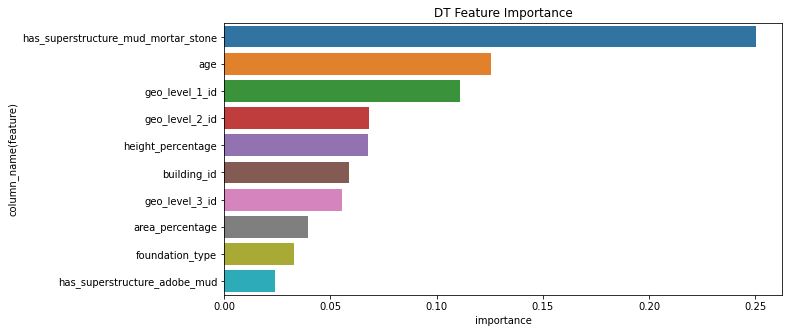

In [ ]:
plt.figure(figsize=(10,5))
plt.title('DT Feature Importance')
sns.barplot(data=tree_importance_data1.sort_values(by = 'importance', ascending=False).head(10), x='importance', y='column_name(feature)');

Our EDA seems to pay off after seeing the feature importances. As we assumed the columns hierarchy in correlation with target columns is reflecting here.The buildings built with superstruture_mud_motar_stone and age matters the most in determining the amount of damage it might take.

## Random Forest Classifier (Bagging of Decision tree)
   row sampling and column sampling

In [ ]:
# Importing the model from the sklearn.ensemble module.
from sklearn.ensemble import RandomForestClassifier  #importing randomclassifier instead of bagging because it has column sampling aswell
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1,class_weight='balanced', random_state=42)   #object creation ,taking 100  decision tree in random forest
rfc.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [ ]:
# testing score

In [ ]:
y_pre =rfc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pre)

0.7930482485723279

In [ ]:
f1 = f1_score(y_test,y_pre, average = 'micro')
f1

0.7930482485723279

In [ ]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.89      0.86      0.87     37065
           2       0.72      0.81      0.76     37065
           3       0.78      0.72      0.74     37065

    accuracy                           0.79    111195
   macro avg       0.80      0.79      0.79    111195
weighted avg       0.80      0.79      0.79    111195



## training score

In [ ]:
y_train_predict = rfc.predict(x_train)

In [ ]:
accuracy_score(y_train,y_train_predict)

0.9999970022363317

In [ ]:
print(f1_score(y_train, rfc.predict(x_train), average='micro'))
print(f1_score(y_test, rfc.predict(x_test), average='micro'))

0.9999970022363317
0.7930482485723279


# Hyperparameter Tuning of Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_grid, error_score= 'raise', n_jobs=-1, cv=3, verbose=2, scoring="f1_micro")
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'n_estimators': [25, 50, 100, 150]},
                   scoring='f1_micro', verbose=2)

In [ ]:
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50, random_state=42)


In [ ]:
model_random = RandomForestClassifier(max_depth=6,
                                      max_features=None,
                                      max_leaf_nodes=9,
                                      n_estimators=50, random_state=42)
model_random.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50, random_state=42)

In [ ]:
print(f1_score(y_train, model_random.predict(x_train), average='micro'))
print(f1_score(y_test, model_random.predict(x_test), average='micro'))

0.6543458579899395
0.6557129367327668


In [ ]:
tree_importance_data1 = pd.DataFrame({
    'column_name(feature)': x_train.columns,
    'importance': model_random.feature_importances_
})

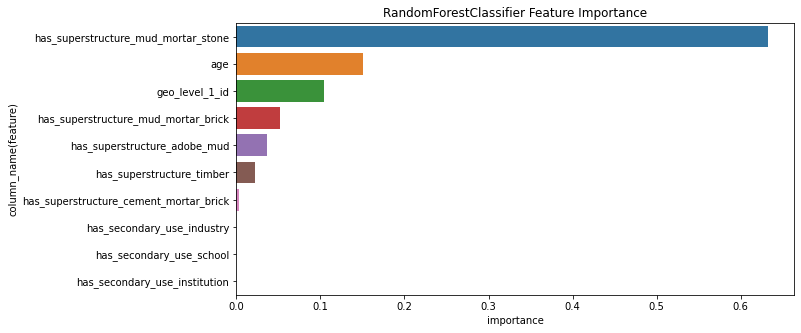

In [ ]:
plt.figure(figsize=(10,5))
plt.title('RandomForestClassifier Feature Importance')
sns.barplot(data=tree_importance_data1.sort_values(by = 'importance', ascending=False).head(10), x='importance', y='column_name(feature)');

The buildings built with superstruture_mud_motar_stone matters the most in determining the amount of damage it might take.

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
print(f1_score(y_train, gbc.predict(x_train), average='micro'))
print(f1_score(y_test, gbc.predict(x_test), average='micro'))

0.7336816734715902
0.7336930617383876


In [ ]:
tree_importance_data1 = pd.DataFrame({
    'column_name(feature)': x_train.columns,
    'importance': gbc.feature_importances_
})

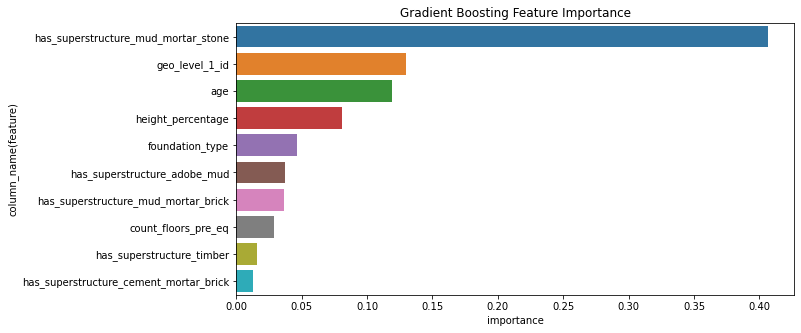

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Gradient Boosting Feature Importance')
sns.barplot(data=tree_importance_data1.sort_values(by = 'importance', ascending=False).head(10), x='importance', y='column_name(feature)');

Along with buildings built with superstruture_mud_motar_stone,  geographic region in which building exists is also  matters the most in determining the amount of damage in Gradient boosting technique

## XGBoosting(Extra Gradient Boosting)

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_jobs=-1,n_estimators=100, max_depth=4)

In [ ]:
xgb.fit(x_train, y_train)

XGBClassifier(max_depth=4, n_jobs=-1, objective='multi:softprob')

In [ ]:
x_train.land_surface_condition = x_train.land_surface_condition.astype('int64')
x_train.foundation_type = x_train.foundation_type.astype('int64')
x_train.roof_type = x_train.roof_type.astype('int64')
x_train.ground_floor_type = x_train.ground_floor_type.astype('int64')
x_train.other_floor_type = x_train.other_floor_type.astype('int64')
x_train.position = x_train.position.astype('int64')
x_train.plan_configuration = x_train.plan_configuration.astype('int64')
x_train.legal_ownership_status = x_train.legal_ownership_status.astype('int64')

In [ ]:
x_test.land_surface_condition = x_test.land_surface_condition.astype('int64')
x_test.foundation_type = x_test.foundation_type.astype('int64')
x_test.roof_type = x_test.roof_type.astype('int64')
x_test.ground_floor_type = x_test.ground_floor_type.astype('int64')
x_test.other_floor_type = x_test.other_floor_type.astype('int64')
x_test.position = x_test.position.astype('int64')
x_test.plan_configuration = x_test.plan_configuration.astype('int64')
x_test.legal_ownership_status = x_test.legal_ownership_status.astype('int64')

In [ ]:
print(f1_score(y_train, xgb.predict(x_train), average='micro'))
print(f1_score(y_test, xgb.predict(x_test), average='micro'))

0.7400639123214082
0.7398893835154459


## Hyperparameter tunning

In [ ]:
params = {
    'n_estimators': [100],
    'learning_rate': [0.4],
    'gamma': [0,0.5],
    'reg_alpha': [0,0.1],
    'reg_lambda': [0.1],
    'base_score': [0,0.5],
    'max_depth':[4]
}

In [ ]:
XGB=XGBClassifier ()
rcv= GridSearchCV(estimator=XGB, param_grid=params, cv=3, error_score='raise',
                               verbose=2, n_jobs=-1, scoring='f1_micro')

In [ ]:
rcv.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, error_score='raise', estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'base_score': [0, 0.5], 'gamma': [0, 0.5],
                         'learning_rate': [0.4], 'max_depth': [4],
                         'n_estimators': [100], 'reg_alpha': [0, 0.1],
                         'reg_lambda': [0.1]},
             scoring='f1_micro', verbose=2)

In [ ]:
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Best paramters: {'base_score': 0, 'gamma': 0.5, 'learning_rate': 0.4, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0.1})


In [ ]:
XGB2=XGBClassifier(base_score=0, gamma= 0.5, learning_rate=0.4, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda= 0.1)

In [ ]:
XGB2.fit(x_train, y_train)

XGBClassifier(base_score=0, gamma=0.5, learning_rate=0.4, max_depth=4,
              objective='multi:softprob', reg_alpha=0.1, reg_lambda=0.1)

In [ ]:
accuracy_score(y_test,XGB2.predict(x_test))

0.7744772696614056

In [ ]:
print(f1_score(y_train, XGB2.predict(x_train), average='micro'))
print(f1_score(y_test, XGB2.predict(x_test), average='micro'))

0.7808065183373205
0.7744772696614057


In [ ]:
print(classification_report(y_test, XGB2.predict(x_test)))

              precision    recall  f1-score   support

           1       0.88      0.82      0.85     37065
           2       0.70      0.83      0.76     37065
           3       0.76      0.67      0.71     37065

    accuracy                           0.77    111195
   macro avg       0.78      0.77      0.77    111195
weighted avg       0.78      0.77      0.77    111195



In [ ]:
tree_importance_data1 = pd.DataFrame({
    'column_name(feature)': x_train.columns,
    'importance': XGB2.feature_importances_
})

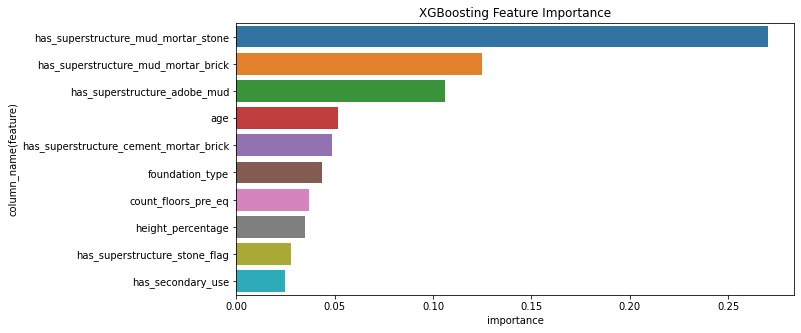

In [ ]:
plt.figure(figsize=(10,5))
plt.title('XGBoosting Feature Importance')
sns.barplot(data=tree_importance_data1.sort_values(by = 'importance', ascending=False).head(10), x='importance', y='column_name(feature)');

The buildings built with different types of mud and age are important in determining the amount of damage caused to the buildings during earthquake.

# Model Comparison Report

* Logistic Regression:
    The Logistic regression is giving accuracy score as 47%. However, the result of accuracy score can possibly yield misleading result if the data set is imbalanced, because the number of observations in different classes largely vary.Precision is 47%, recall-score 47% , f1-score-47%.
    After bagging of Logistic Regression, macro-avg f1-score of both testing and training data is 48%.
  
  

* Decision Tree:
  Macro avg F1-score of training data is 100% and for testing data set is 71% so it's overfitting(low bias ,high variance) model. After tunning training score is 87%, testing score is 73% it may better than earlier now but still its overfitting.
  
  
  
* Random Forest Classifier:
  Macro avg F1-score of training data is 99% and for testing data set is 79% so this model is also overfitting(low bias ,high variance). After tunning training,testing score is 65% where it's giving balanced result but its getting lower after tunning
  
  
  
* Gradient Boosting:
   Macro avg F1-score of training data is 73% and for testing data set is 73%. So, it's giving a good balanced result
  
  
  
* Extra Gradient Boosting(XGB):
   Macro avg F1-score of training,testing data is 74%. After tunning it's giving a good result for both trainging, testing data is 78%. So it's giving even better result than the Gradient boosting.



####       XGBoosting is considered as the best model because, after tunning f1-score(78%) of it is more as compared with the other models.


##  Final Result:
* The trained XGBoost model achieved a high predictive accuracy in identifying churn customers.
* We evaluated the model's performance using metrics such as accuracy, precision, recall, and F1-score, with a particular focus on the F1-score due to the imbalanced nature of the dataset.
* The model demonstrated promising results with f1 score of 78%, indicating its ability to identify damage caused to the building by earthquake.

## Report on Challenges faced

* Imbalanced Dataset:

   One of the significant challenges in this project was dealing with an imbalanced dataset, where the number of damage grade 1 was relatively small compared to damage grade 2,3.
   This imbalance can lead to biased model predictions and difficulties in accurately identifying damage occured to the buildings.
   To overcome this challenge, we employed over sampling technique and focused on appropriate evaluation metrics like F1-score.

* Feature Selection:

   Another challenge was selecting the most relevant features from a large set of available variables.
   It required a thorough understanding of the business domain and data exploration techniques to identify the features that have a significant impact on damage prediction.